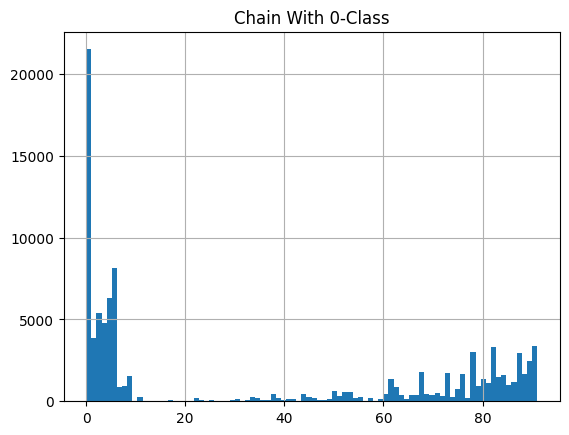

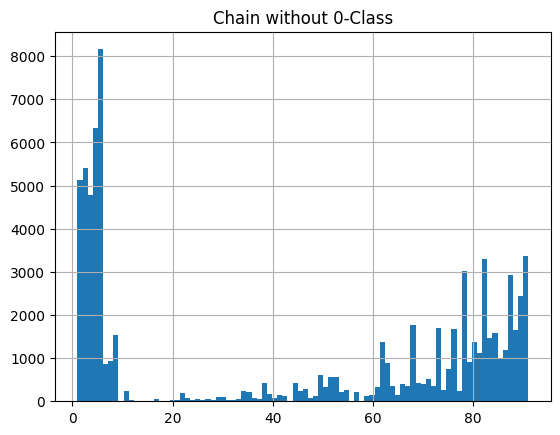

In [43]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/dataset/train.csv")
n_chain_ids = df['chain'].nunique()

def plot(path):
    return pd.read_csv(path, names=['path', 'chain_id'], sep=' ')

df.hist('chain', bins=n_chain_ids)
from matplotlib import pyplot as plt
plt.title("Chain With 0-Class")
plt.show()

df[df.chain!=0].hist('chain', bins=n_chain_ids)
plt.title("Chain without 0-Class")
plt.show()

      level_0  level_1                     path  chain_id
0       Train        0   5/c686edc33cc0c55b.jpg        41
1       Train        1   0/de23cb0cd24cf196.jpg         0
2       Train        2  77/ad55c24bda44b5a5.jpg        71
3       Train        3  50/babc44c3e9a0923f.jpg        42
4       Train        4  89/c9f4f239249acd32.jpg        84
...       ...      ...                      ...       ...
97551    Test     3199  34/fff04881c8731e87.jpg        25
97552    Test     3200   0/fcfc87c398a82334.jpg         0
97553    Test     3201   6/fe5b2926592813c7.jpg        52
97554    Test     3202  90/fcb2b38c38467cc1.jpg        86
97555    Test     3203  54/fb98d13803303e6f.jpg        46

[97556 rows x 4 columns]


array([[<AxesSubplot: title={'center': 'Test'}>,
        <AxesSubplot: title={'center': 'Train'}>],
       [<AxesSubplot: title={'center': 'Val'}>, <AxesSubplot: >]],
      dtype=object)

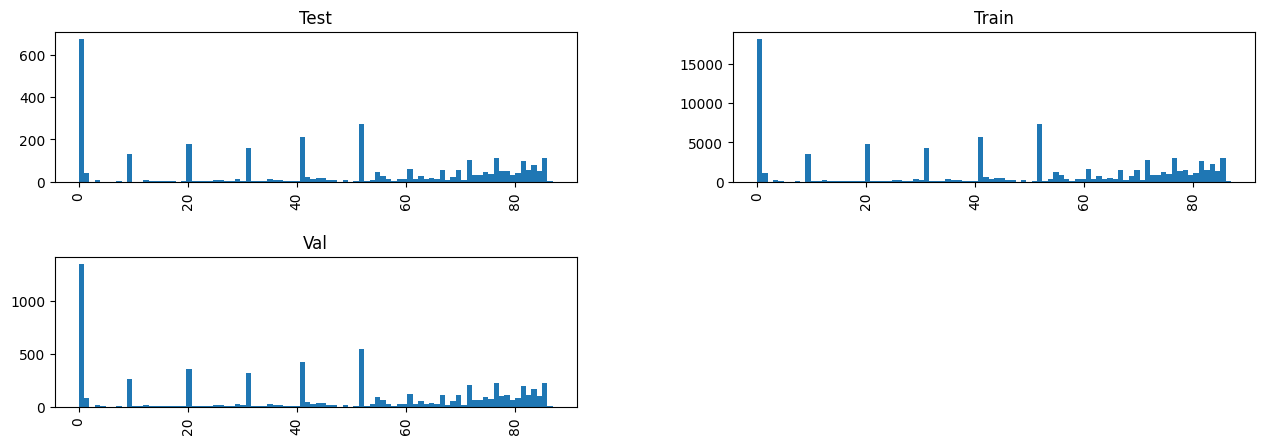

In [44]:
chain_ids = []
chain_ids.append(plot("../../tmp/hotel_train_chain.csv"))
chain_ids.append(plot("../../tmp/hotel_val_chain.csv"))
chain_ids.append(plot("../../tmp/hotel_test_chain.csv"))
split_data = pd.concat(chain_ids, axis=0, keys=['Train', 'Val', 'Test'])
split_data = split_data.reset_index()
print(split_data)
split_data.hist(column='chain_id', bins=88, by='level_0', figsize=(15, 5))

,level_1,path,chain_id,correct_chain_id
level_0,,,,
Train,76800,0/e307d93838f90f43.jpg,0,0
Train,63632,0/c2978b713c6e4ccc.jpg,0,0
Train,79867,0/bbbc08d1523a75c9.jpg,0,0
Train,63631,0/8dc1709f2f692dd0.jpg,0,0
Train,32810,0/c0c03c0f1f3fc3f1.jpg,0,0
...,...,...,...,...
Train,15716,91/eea1d22e95d12ac5.jpg,87,91
Train,67912,91/c1872d95c32a3df4.jpg,87,91
Train,2369,91/e090be885eb3ccd6.jpg,87,91


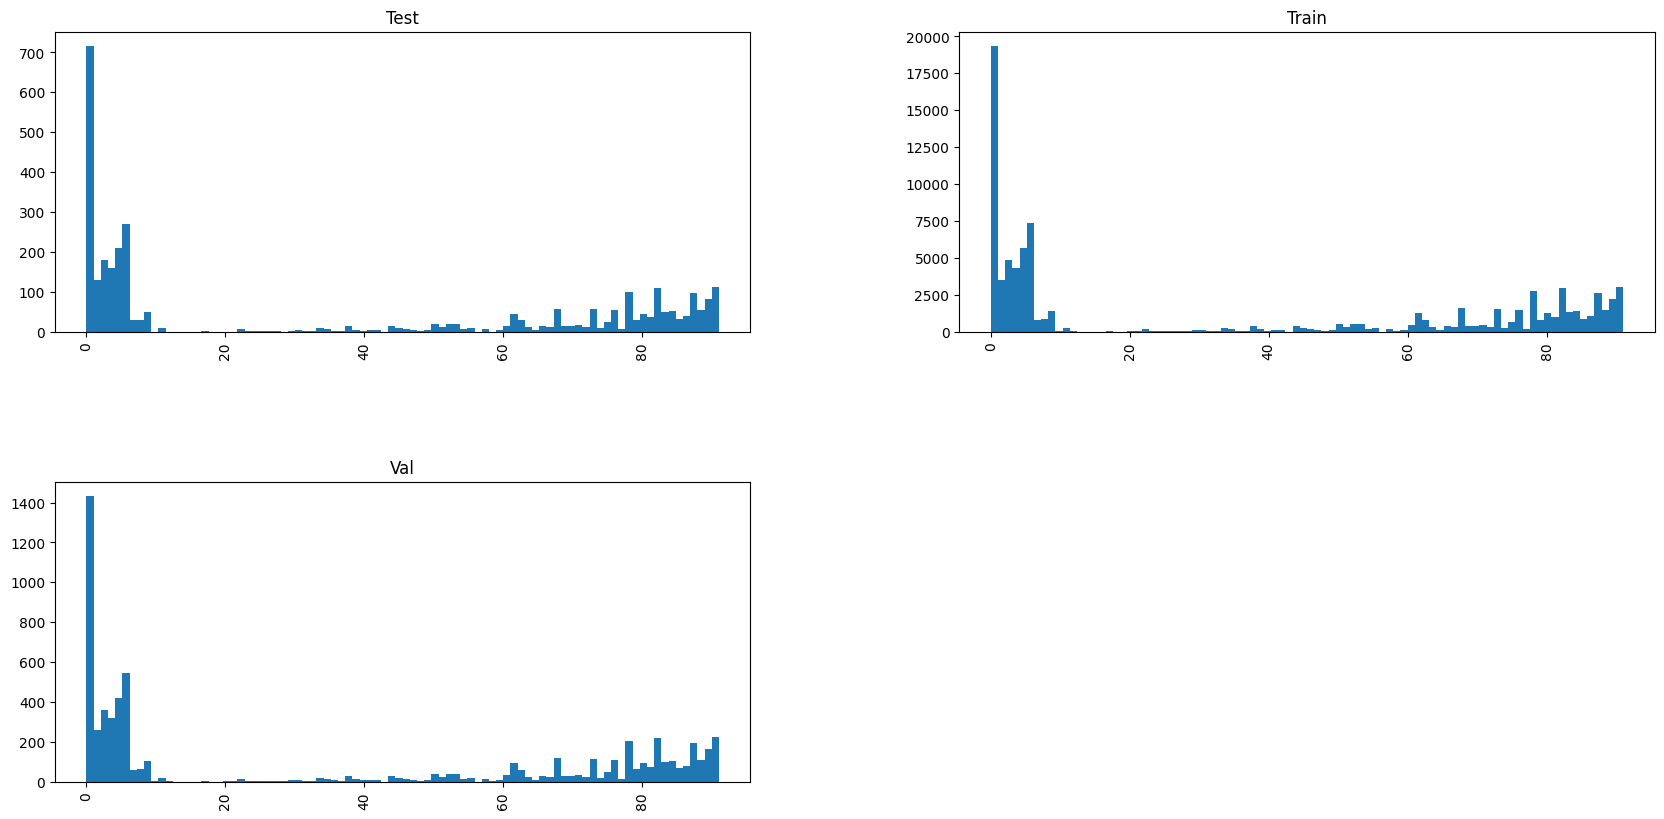

In [59]:
split_data['correct_chain_id'] = split_data.path.map(lambda s: s.split('/')[0]).astype(int)
split_data_i = split_data.set_index('level_0')
# split_data_i = split_data_i.sort_values('correct_chain_id')
split_data_i.hist('correct_chain_id', bins=88, by='level_0', figsize=(20, 10))
split_data_i

### GT Hotel ID Frequency

<AxesSubplot: >

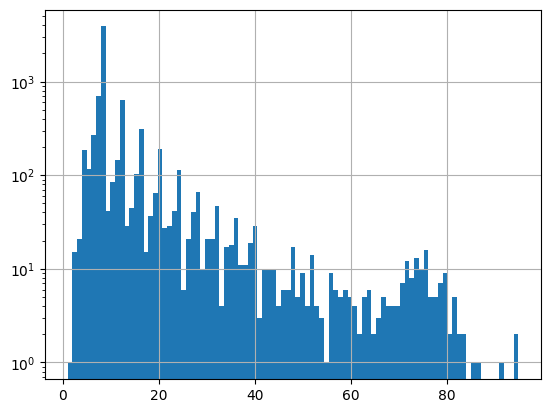

In [11]:
freq = pd.read_csv("../../data/dataset/train.csv").value_counts('hotel_id')
freq.hist(bins=freq.max(), log=True)